# Machine Learning (Only Fund Flow Features)

## Modules and functions

Import all the modules:

In [1]:
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

from notebooks import *

## Loading

In [2]:
df_file_path = "dataset-filtered.csv"
df = pd.read_csv(df_file_path, low_memory=False)

In [3]:
print_dimensions(df)

The dataset has 158863 rows and 434 columns


## Prepare data

In [4]:
addresses, X, y_binary, y_multi, scaler, feature_names = extract_experiment_data(df, ["fund flow"])

Extracted values:
addresses (158863,)
features (158863, 73)
labels_binary (158863,)
labels_multi (158863,)


In [5]:
for feature_name in feature_names:
    print(feature_name)

symbol_22
symbol_33
symbol_39
symbol_41
symbol_43
symbol_49
symbol_51
symbol_53
symbol_54
symbol_55
symbol_57
symbol_59
symbol_61
symbol_62
symbol_63
symbol_65
symbol_66
symbol_67
symbol_69
symbol_71
symbol_73
symbol_75
symbol_76
symbol_77
symbol_78
symbol_79
symbol_81
symbol_82
symbol_83
symbol_85
symbol_86
symbol_87
symbol_93
symbol_95
symbol_103
symbol_105
symbol_113
symbol_121
symbol_122
symbol_123
symbol_127
symbol_129
symbol_133
symbol_135
symbol_137
symbol_171
symbol_173
symbol_177
symbol_179
symbol_181
symbol_183
symbol_185
symbol_187
symbol_189
symbol_191
symbol_193
symbol_194
symbol_195
symbol_197
symbol_198
symbol_199
symbol_201
symbol_202
symbol_203
symbol_204
symbol_205
symbol_207
symbol_208
symbol_209
symbol_211
symbol_213
symbol_214
symbol_215


## Classification

In [6]:
xgb_scale_pos_weight = compute_scale_pos_weight(y_binary)

In [7]:
def create_xgb_model():
    return XGBClassifier(n_jobs=10,
                         scale_pos_weight=xgb_scale_pos_weight,
                         n_estimators=25,
                         max_depth=3)

In [8]:
xgb_models = train_test_folds(X,
                              y_binary,
                              k_fold(X, n_splits=10),
                              create_xgb_model)

train ROC AUC 0.954 TN  137821 FP  4895 FN    15 TP   245
test  ROC AUC 0.924 TN  15256 FP   596 FN     4 TP    31
train score - test score = 0.030

train ROC AUC 0.950 TN  137160 FP  5552 FN    16 TP   248
test  ROC AUC 0.948 TN  15244 FP   612 FN     2 TP    29
train score - test score = 0.002

train ROC AUC 0.953 TN  137508 FP  5206 FN    15 TP   247
test  ROC AUC 0.936 TN  15268 FP   586 FN     3 TP    30
train score - test score = 0.017

train ROC AUC 0.954 TN  137137 FP  5576 FN    14 TP   250
test  ROC AUC 0.931 TN  15209 FP   646 FN     3 TP    28
train score - test score = 0.023

train ROC AUC 0.951 TN  138504 FP  4212 FN    18 TP   243
test  ROC AUC 0.928 TN  15434 FP   418 FN     4 TP    30
train score - test score = 0.023

train ROC AUC 0.952 TN  137491 FP  5219 FN    16 TP   251
test  ROC AUC 0.947 TN  15297 FP   561 FN     2 TP    26
train score - test score = 0.005

train ROC AUC 0.949 TN  138545 FP  4170 FN    19 TP   243
test  ROC AUC 0.925 TN  15410 FP   443 FN     4 

In [9]:
feature_importance = compute_average_feature_importance(X, xgb_models)

In [10]:
display(create_feature_importance_table(feature_names, feature_importance, size=10))

,Feature,Importance
0,symbol_83,0.797042
1,symbol_201,0.036533
2,symbol_79,0.031031
3,symbol_39,0.027004
4,symbol_73,0.023639
5,symbol_205,0.015515
6,symbol_33,0.015306
7,symbol_213,0.010379
8,symbol_77,0.010184
9,symbol_173,0.008347


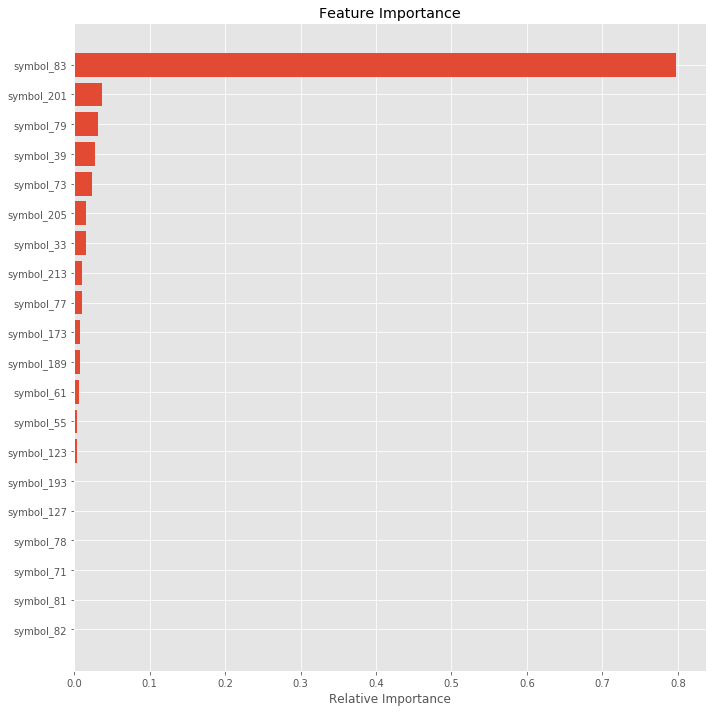

In [11]:
plot_feature_importance(feature_names, feature_importance)